In [14]:
import numpy as np
import torch
import os 
import matplotlib.pyplot as plt

from torch.optim import Adam
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
from torchvision.datasets import FashionMNIST
from tqdm import tqdm
from torchvision.utils import make_grid

# Discriminator Model

In [15]:
class Discriminator(nn.Module):
    def __init__(self, in_dim = 784, num_classes = 10, embedding_dim = 10):
        super().__init__()
        
        self.embedding_layer = nn.Embedding(num_classes, embedding_dim)
        
        self.model = nn.Sequential(
            nn.Linear(in_dim + embedding_dim, 1024),
            nn.LeakyReLU(0.2, inplace = True),
            nn.Dropout(0.3),
            
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace = True),
            nn.Dropout(0.3),
            
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace = True),
            nn.Dropout(0.3),
            
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x, y):
        # x: batch_size, channels, height, width
        # y: batch_size
        x = x.view(x.shape[0], -1)
        
        # embedding_label: batch_size, embedding_dim
        y = self.embedding_layer(y)
        
        x = torch.cat([x, y], dim = 1)
        
        return self.model(x)
        

In [16]:
# model = Discriminator()
# x = torch.rand(3,1,28,28)
# y = torch.randint(0,9,(3,))
# model(x,y)

# Generator Model

In [17]:
class Generator(nn.Module):
    def __init__(self, latent_dim = 100, hidden_dim = 256, out_dim = 784, embedding_dim = 10, num_classes = 10):
        super().__init__()
        
        self.embedding_layer = nn.Embedding(num_classes, embedding_dim)
        self.gen_model = nn.Sequential(
            nn.Linear(latent_dim + embedding_dim, hidden_dim),
            nn.LeakyReLU(0.2, inplace = True),
            
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.LeakyReLU(0.2, inplace = True),
            
            nn.Linear(hidden_dim * 2, hidden_dim * 4),
            nn.LeakyReLU(0.2, inplace = True),
            
            nn.Linear(hidden_dim * 4, out_dim),
            nn.Tanh()
        )
        
    def forward(self, x, y):
        # x: batch_size, latent_dim
        # y: batch_size 
        
        y = self.embedding_layer(y)
        x = torch.cat([x, y], dim = 1)
        
        x = self.gen_model(x)
        x = x.reshape((x.shape[0], 1, 28, 28))
        return x
        

# Parameters

In [18]:
num_workers = os.cpu_count()
batch_size = 512
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lr = 1e-4
betas = (0.9, 0.999)
latent_size = 100
num_classes = 10

# DataLoader

In [19]:
transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(mean=(0.5), std=(0.5))
    ]
)

dataset = FashionMNIST(root = 'FashionMNIST/raw/train-images-idx3-ubyte', train = True, download = True, transform = transform)
train_loader = DataLoader(dataset, batch_size = batch_size, shuffle = True, drop_last = True, num_workers = num_workers)

# Model

In [20]:
dis_model = Discriminator().to(device)
gen_model = Generator().to(device)

dis_optim = Adam(dis_model.parameters(), lr = lr)
gen_optim = Adam(gen_model.parameters(), lr = lr)

criterion = nn.BCELoss()

# Train

In [32]:
latent_size = (batch_size, 100)
fixed_noise = torch.rand(latent_size).to(device)
fixed_labels = torch.randint(0, num_classes, (batch_size,)).to(device)
epochs = 100
img_list = []

Epoch: 1/100: 100%|███████████████████████████████████████████████| 117/117 [00:10<00:00, 11.09it/s]


Epoch 1: d_loss:  0.5417, g_loss:  2.6610


Epoch: 2/100: 100%|███████████████████████████████████████████████| 117/117 [00:11<00:00, 10.55it/s]


Epoch 2: d_loss:  0.5512, g_loss:  2.6945


Epoch: 3/100: 100%|███████████████████████████████████████████████| 117/117 [00:10<00:00, 11.04it/s]


Epoch 3: d_loss:  0.5845, g_loss:  2.5946


Epoch: 4/100: 100%|███████████████████████████████████████████████| 117/117 [00:10<00:00, 10.77it/s]


Epoch 4: d_loss:  0.5612, g_loss:  2.6010


Epoch: 6/100: 100%|███████████████████████████████████████████████| 117/117 [00:10<00:00, 11.31it/s]


Epoch 6: d_loss:  0.5619, g_loss:  2.6369


Epoch: 7/100: 100%|███████████████████████████████████████████████| 117/117 [00:10<00:00, 10.73it/s]


Epoch 7: d_loss:  0.5590, g_loss:  2.5300


Epoch: 8/100: 100%|███████████████████████████████████████████████| 117/117 [00:10<00:00, 11.05it/s]


Epoch 8: d_loss:  0.5543, g_loss:  2.5473


Epoch: 9/100: 100%|███████████████████████████████████████████████| 117/117 [00:10<00:00, 11.10it/s]


Epoch 9: d_loss:  0.5708, g_loss:  2.5800


Epoch: 10/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.57it/s]


Epoch 10: d_loss:  0.5727, g_loss:  2.5733


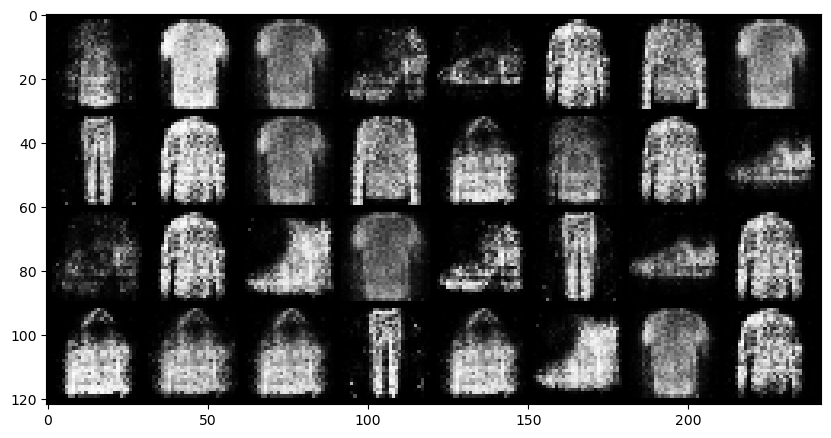

Epoch: 11/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 11.11it/s]


Epoch 11: d_loss:  0.6146, g_loss:  2.4731


Epoch: 12/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 11.16it/s]


Epoch 12: d_loss:  0.6323, g_loss:  2.4289


Epoch: 13/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.59it/s]


Epoch 13: d_loss:  0.5663, g_loss:  2.6377


Epoch: 14/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 11.11it/s]


Epoch 14: d_loss:  0.5692, g_loss:  2.5885


Epoch: 15/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.73it/s]


Epoch 15: d_loss:  0.6155, g_loss:  2.4499


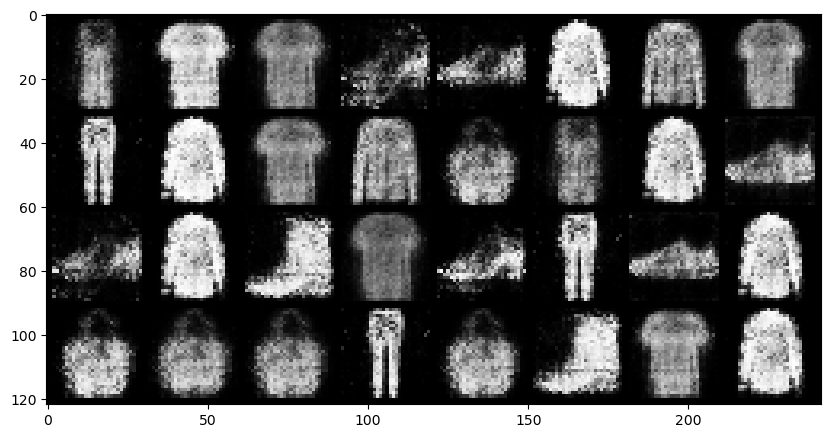

Epoch: 16/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.17it/s]


Epoch 16: d_loss:  0.5794, g_loss:  2.5429


Epoch: 17/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.76it/s]


Epoch 17: d_loss:  0.5719, g_loss:  2.5074


Epoch: 18/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.88it/s]


Epoch 18: d_loss:  0.6091, g_loss:  2.5286


Epoch: 19/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.13it/s]


Epoch 19: d_loss:  0.6234, g_loss:  2.4263


Epoch: 20/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.79it/s]


Epoch 20: d_loss:  0.5818, g_loss:  2.4779


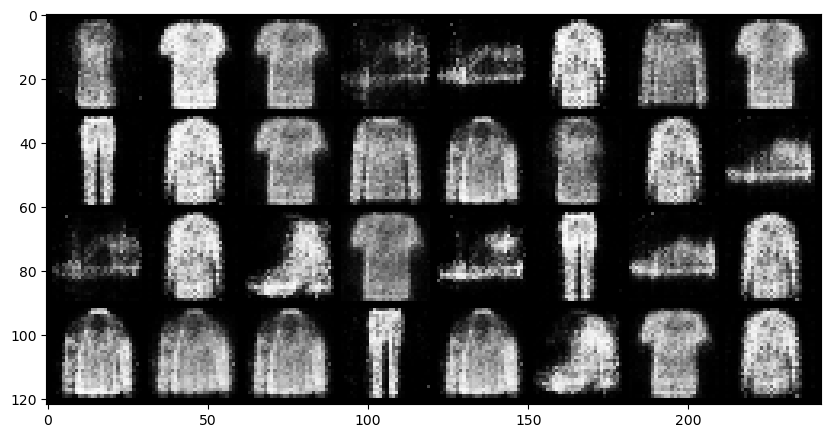

Epoch: 21/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.90it/s]


Epoch 21: d_loss:  0.5896, g_loss:  2.4482


Epoch: 22/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.23it/s]


Epoch 22: d_loss:  0.5830, g_loss:  2.5717


Epoch: 23/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.89it/s]


Epoch 23: d_loss:  0.6096, g_loss:  2.4292


Epoch: 24/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.80it/s]


Epoch 24: d_loss:  0.6013, g_loss:  2.4550


Epoch: 25/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00,  9.93it/s]


Epoch 25: d_loss:  0.6158, g_loss:  2.3733


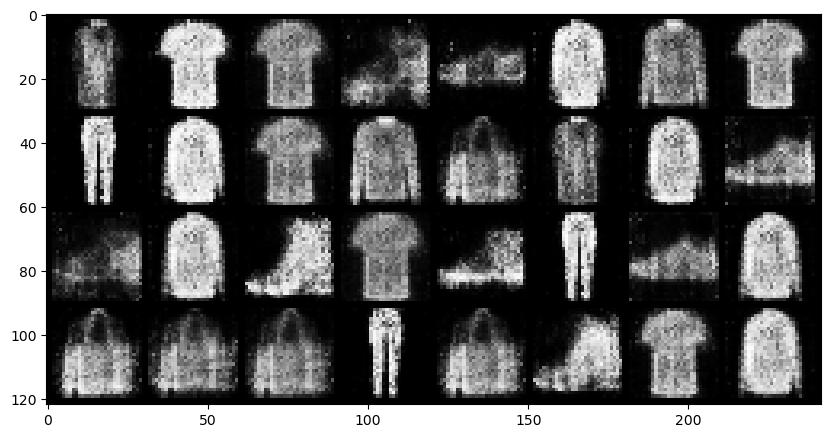

Epoch: 26/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.73it/s]


Epoch 26: d_loss:  0.6626, g_loss:  2.3354


Epoch: 27/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.66it/s]


Epoch 27: d_loss:  0.6116, g_loss:  2.4274


Epoch: 28/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.07it/s]


Epoch 28: d_loss:  0.6259, g_loss:  2.3771


Epoch: 29/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.78it/s]


Epoch 29: d_loss:  0.6449, g_loss:  2.3195


Epoch: 30/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.54it/s]


Epoch 30: d_loss:  0.6418, g_loss:  2.3237


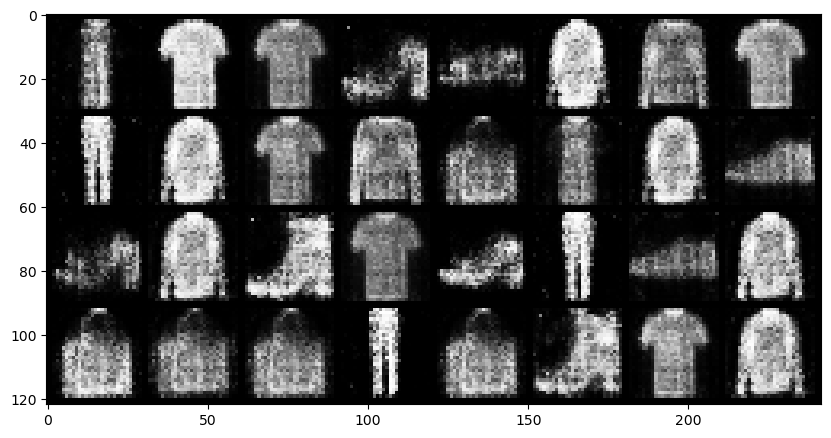

Epoch: 31/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.05it/s]


Epoch 31: d_loss:  0.6125, g_loss:  2.3176


Epoch: 32/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.66it/s]


Epoch 32: d_loss:  0.6258, g_loss:  2.3346


Epoch: 33/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00,  9.96it/s]


Epoch 33: d_loss:  0.6492, g_loss:  2.3174


Epoch: 34/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.83it/s]


Epoch 34: d_loss:  0.6389, g_loss:  2.2304


Epoch: 35/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.74it/s]


Epoch 35: d_loss:  0.6438, g_loss:  2.2556


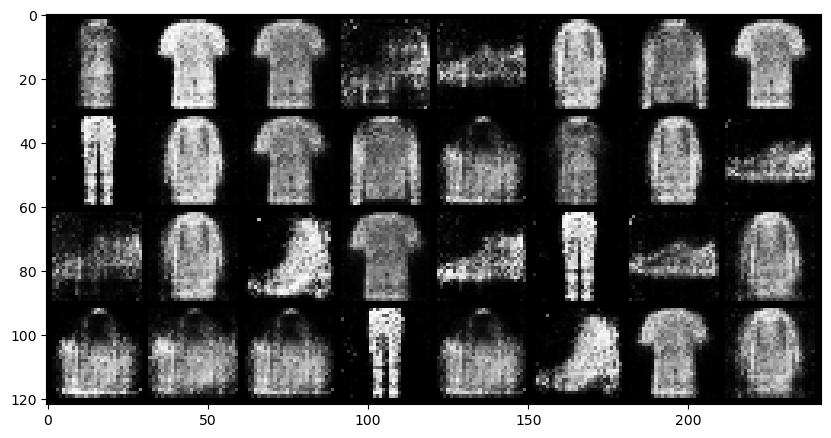

Epoch: 36/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.05it/s]


Epoch 36: d_loss:  0.6847, g_loss:  2.2090


Epoch: 37/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.91it/s]


Epoch 37: d_loss:  0.6472, g_loss:  2.2386


Epoch: 38/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.73it/s]


Epoch 38: d_loss:  0.6863, g_loss:  2.1782


Epoch: 39/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.18it/s]


Epoch 39: d_loss:  0.6630, g_loss:  2.3048


Epoch: 40/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.80it/s]


Epoch 40: d_loss:  0.6597, g_loss:  2.2181


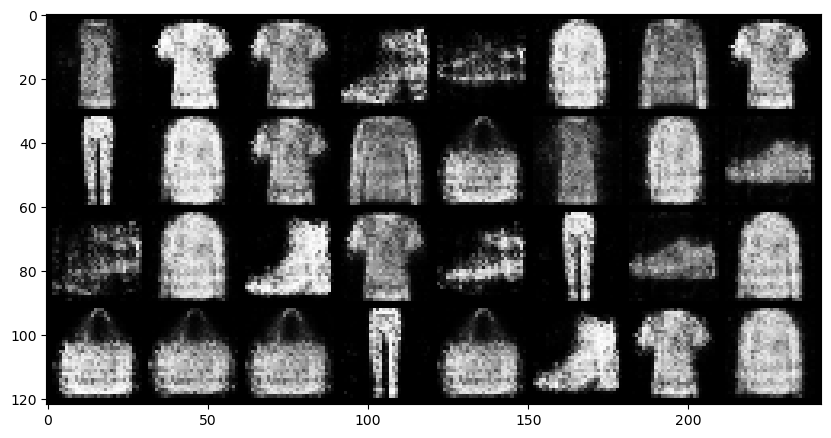

Epoch: 41/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.82it/s]


Epoch 41: d_loss:  0.6747, g_loss:  2.1795


Epoch: 42/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.08it/s]


Epoch 42: d_loss:  0.7045, g_loss:  2.1547


Epoch: 43/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.86it/s]


Epoch 43: d_loss:  0.6911, g_loss:  2.1369


Epoch: 44/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.77it/s]


Epoch 44: d_loss:  0.6605, g_loss:  2.2228


Epoch: 45/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.14it/s]


Epoch 45: d_loss:  0.6997, g_loss:  2.1098


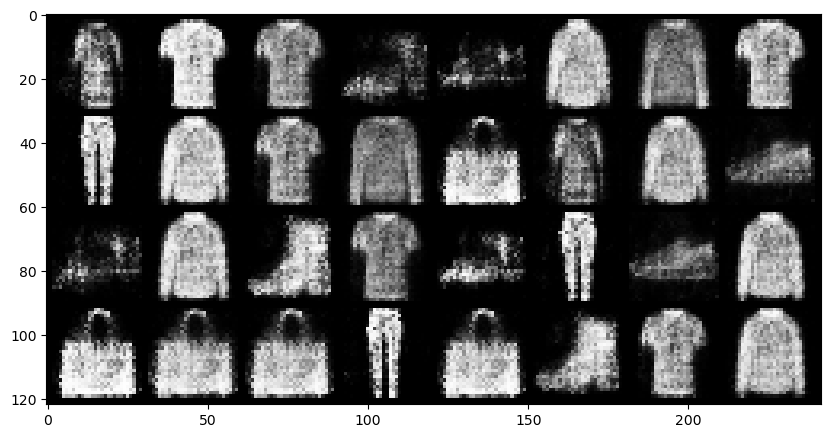

Epoch: 46/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.67it/s]


Epoch 46: d_loss:  0.7162, g_loss:  2.1145


Epoch: 47/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.64it/s]


Epoch 47: d_loss:  0.7161, g_loss:  2.0572


Epoch: 48/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.07it/s]


Epoch 48: d_loss:  0.6944, g_loss:  2.0958


Epoch: 49/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.62it/s]


Epoch 49: d_loss:  0.7079, g_loss:  2.0996


Epoch: 50/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.53it/s]


Epoch 50: d_loss:  0.6761, g_loss:  2.1740


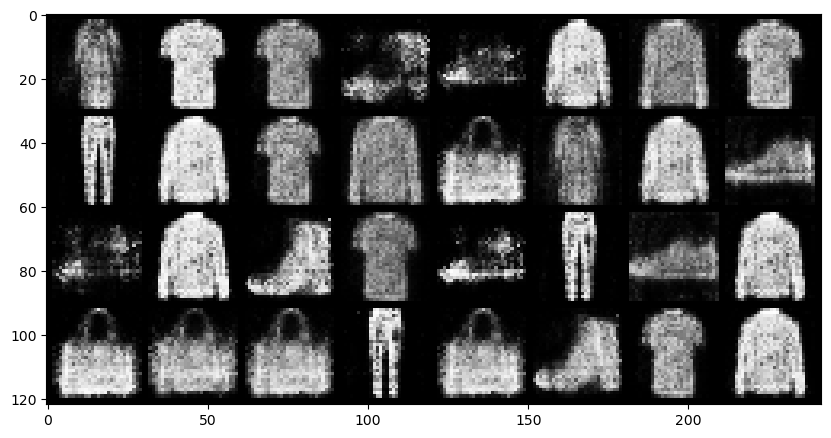

Epoch: 51/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.49it/s]


Epoch 51: d_loss:  0.6988, g_loss:  2.1375


Epoch: 52/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.66it/s]


Epoch 52: d_loss:  0.6968, g_loss:  2.1164


Epoch: 53/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.22it/s]


Epoch 53: d_loss:  0.6971, g_loss:  2.1180


Epoch: 54/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.79it/s]


Epoch 54: d_loss:  0.7306, g_loss:  2.0961


Epoch: 55/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.77it/s]


Epoch 55: d_loss:  0.7298, g_loss:  2.0697


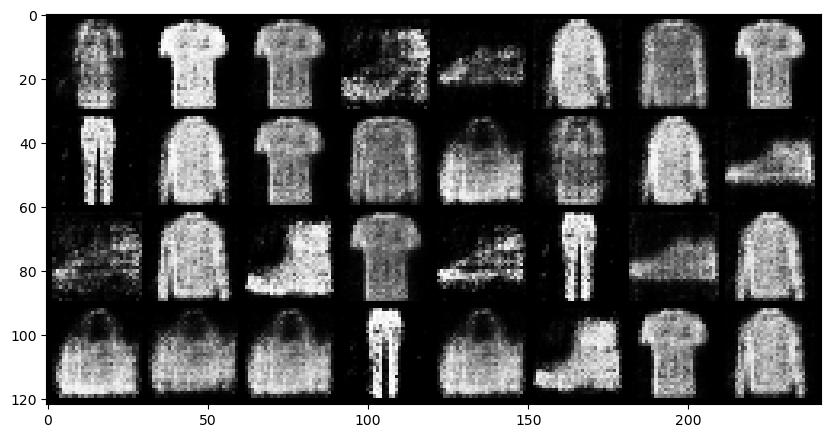

Epoch: 56/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.20it/s]


Epoch 56: d_loss:  0.7024, g_loss:  2.0922


Epoch: 57/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.66it/s]


Epoch 57: d_loss:  0.7160, g_loss:  2.0371


Epoch: 58/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.73it/s]


Epoch 58: d_loss:  0.7022, g_loss:  2.0786


Epoch: 59/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.30it/s]


Epoch 59: d_loss:  0.7301, g_loss:  1.9830


Epoch: 60/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.69it/s]


Epoch 60: d_loss:  0.7298, g_loss:  2.0463


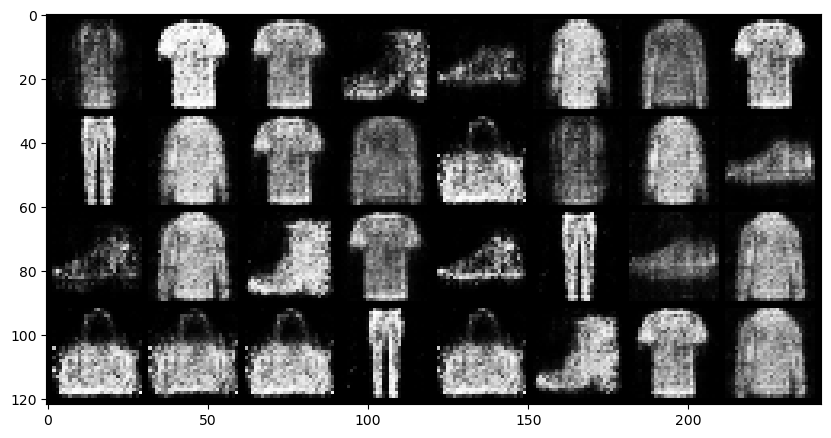

Epoch: 61/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.79it/s]


Epoch 61: d_loss:  0.7195, g_loss:  1.9810


Epoch: 62/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.21it/s]


Epoch 62: d_loss:  0.7225, g_loss:  1.9686


Epoch: 63/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.80it/s]


Epoch 63: d_loss:  0.7097, g_loss:  2.0594


Epoch: 64/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 11.01it/s]


Epoch 64: d_loss:  0.7380, g_loss:  2.0665


Epoch: 65/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.29it/s]


Epoch 65: d_loss:  0.7130, g_loss:  2.0380


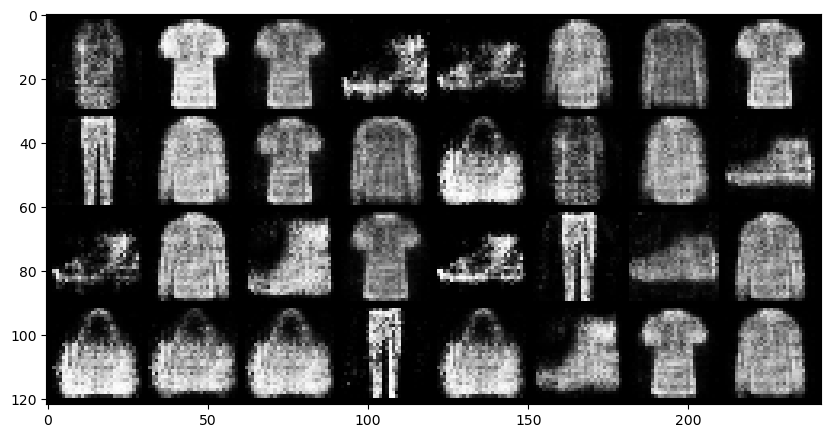

Epoch: 66/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.79it/s]


Epoch 66: d_loss:  0.7650, g_loss:  1.9799


Epoch: 67/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.81it/s]


Epoch 67: d_loss:  0.7350, g_loss:  2.0307


Epoch: 68/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.10it/s]


Epoch 68: d_loss:  0.7348, g_loss:  1.9890


Epoch: 69/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.67it/s]


Epoch 69: d_loss:  0.7754, g_loss:  1.9103


Epoch: 70/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.85it/s]


Epoch 70: d_loss:  0.7240, g_loss:  1.9312


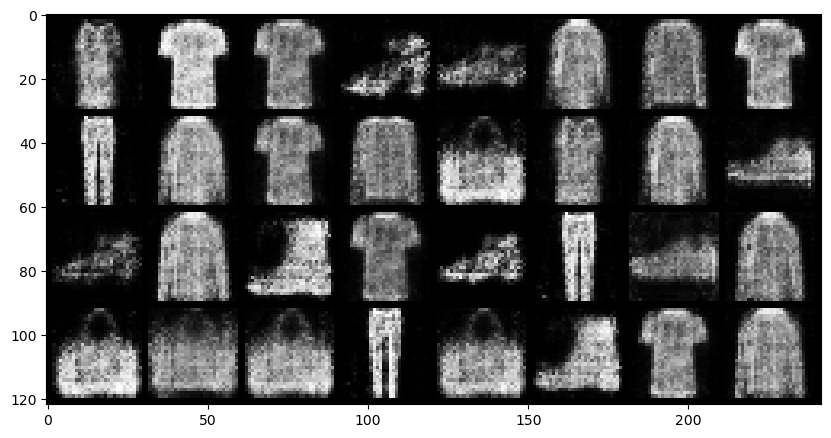

Epoch: 71/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.02it/s]


Epoch 71: d_loss:  0.7394, g_loss:  2.0172


Epoch: 72/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.81it/s]


Epoch 72: d_loss:  0.7671, g_loss:  1.9946


Epoch: 73/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.13it/s]


Epoch 73: d_loss:  0.7352, g_loss:  1.9641


Epoch: 74/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.70it/s]


Epoch 74: d_loss:  0.7853, g_loss:  1.8673


Epoch: 75/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.77it/s]


Epoch 75: d_loss:  0.7766, g_loss:  1.9041


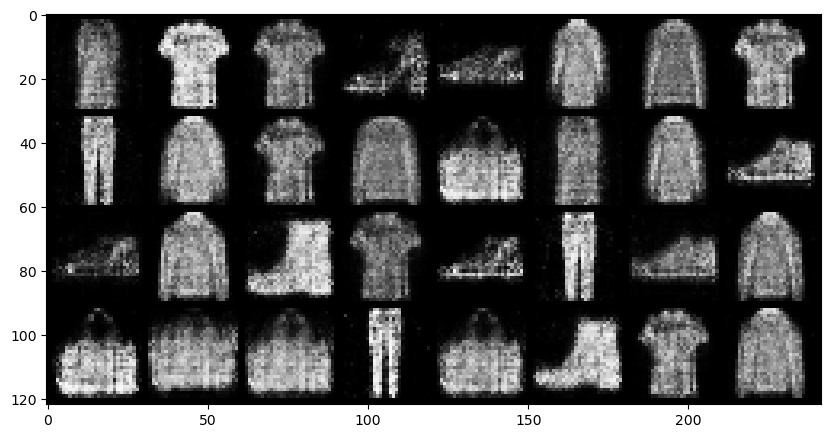

Epoch: 76/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00,  9.94it/s]


Epoch 76: d_loss:  0.7525, g_loss:  2.0051


Epoch: 77/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.77it/s]


Epoch 77: d_loss:  0.7957, g_loss:  1.9196


Epoch: 78/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.71it/s]


Epoch 78: d_loss:  0.7899, g_loss:  1.8828


Epoch: 79/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00,  9.99it/s]


Epoch 79: d_loss:  0.7608, g_loss:  1.9220


Epoch: 80/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.84it/s]


Epoch 80: d_loss:  0.7789, g_loss:  1.8715


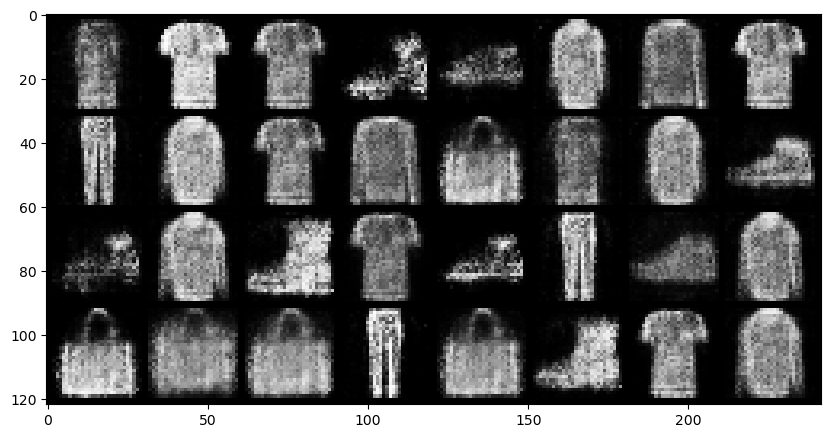

Epoch: 81/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.90it/s]


Epoch 81: d_loss:  0.8012, g_loss:  1.8102


Epoch: 82/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.08it/s]


Epoch 82: d_loss:  0.7871, g_loss:  1.8813


Epoch: 83/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.71it/s]


Epoch 83: d_loss:  0.7997, g_loss:  1.8798


Epoch: 84/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.72it/s]


Epoch 84: d_loss:  0.7937, g_loss:  1.8101


Epoch: 85/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.01it/s]


Epoch 85: d_loss:  0.7936, g_loss:  1.8420


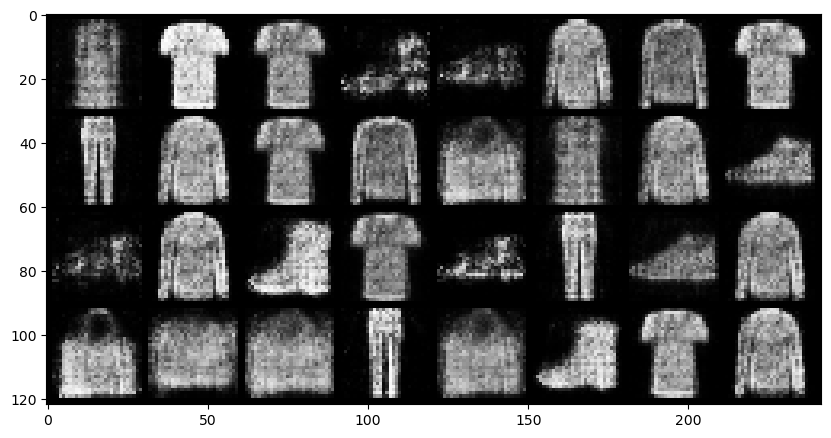

Epoch: 86/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.70it/s]


Epoch 86: d_loss:  0.8029, g_loss:  1.8099


Epoch: 87/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.73it/s]


Epoch 87: d_loss:  0.8000, g_loss:  1.8128


Epoch: 88/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.07it/s]


Epoch 88: d_loss:  0.8034, g_loss:  1.8014


Epoch: 89/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.63it/s]


Epoch 89: d_loss:  0.8558, g_loss:  1.7209


Epoch: 90/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.06it/s]


Epoch 90: d_loss:  0.8570, g_loss:  1.7019


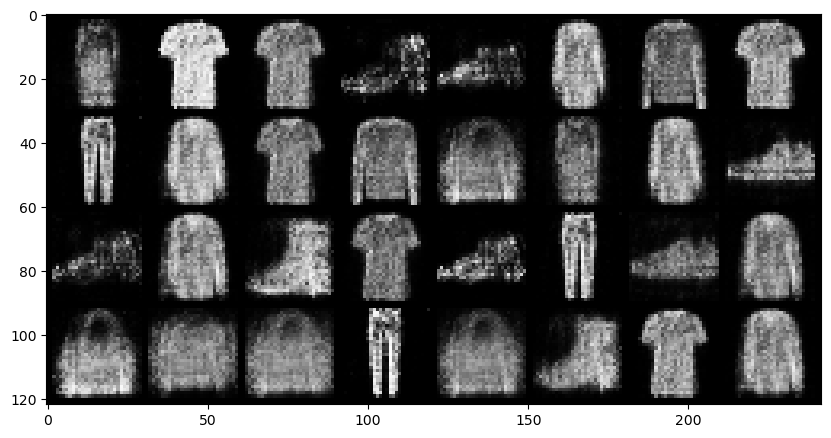

Epoch: 91/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.73it/s]


Epoch 91: d_loss:  0.8665, g_loss:  1.6824


Epoch: 92/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.79it/s]


Epoch 92: d_loss:  0.8244, g_loss:  1.7507


Epoch: 93/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.11it/s]


Epoch 93: d_loss:  0.8484, g_loss:  1.7534


Epoch: 94/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.63it/s]


Epoch 94: d_loss:  0.8404, g_loss:  1.6622


Epoch: 95/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.89it/s]


Epoch 95: d_loss:  0.8341, g_loss:  1.7474


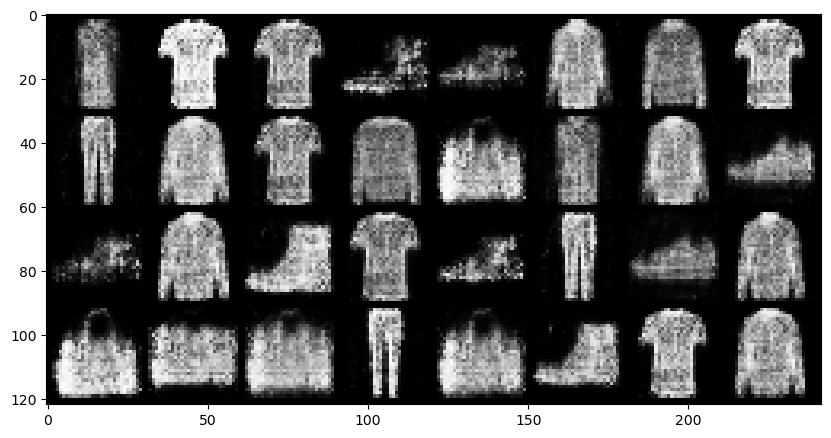

Epoch: 96/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.12it/s]


Epoch 96: d_loss:  0.8481, g_loss:  1.7356


Epoch: 97/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.90it/s]


Epoch 97: d_loss:  0.8241, g_loss:  1.7333


Epoch: 98/100: 100%|██████████████████████████████████████████████| 117/117 [00:10<00:00, 10.81it/s]


Epoch 98: d_loss:  0.8684, g_loss:  1.6940


Epoch: 99/100: 100%|██████████████████████████████████████████████| 117/117 [00:11<00:00, 10.13it/s]


Epoch 99: d_loss:  0.8394, g_loss:  1.7359


Epoch: 100/100: 100%|█████████████████████████████████████████████| 117/117 [00:10<00:00, 10.83it/s]


Epoch 100: d_loss:  0.8551, g_loss:  1.6822


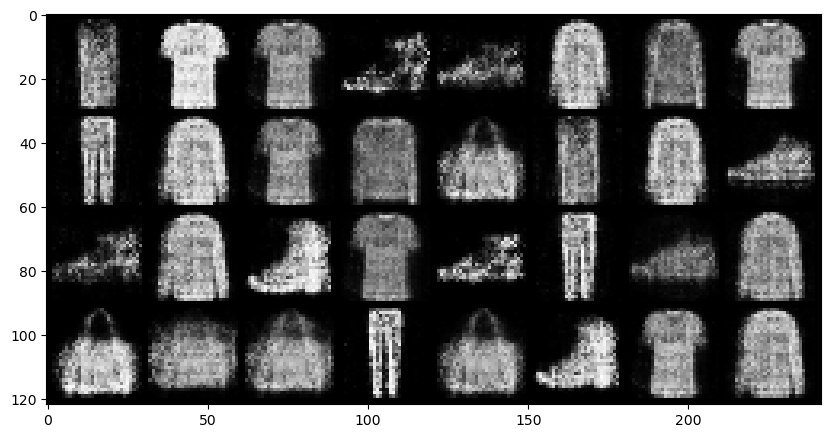

In [33]:
for epoch in range(1, epochs + 1):
    dis_model.train()
    gen_model.train()
    
    total_d_loss = 0
    total_g_loss = 0
    
    for x, y in tqdm(train_loader, desc = f'Epoch: {epoch}/{epochs}', ncols = 100):
        
        ### ============== Train Discriminator ======================
        dis_optim.zero_grad()
        x, y = x.to(device), y.to(device)
        
#         labels = torch.distributions.Uniform(0.9, 1.0).sample((batch_size,1)).to(device)
        labels = torch.ones((batch_size, 1), dtype = torch.float32).to(device)

        real_output = dis_model(x,y)
        real_loss = criterion(real_output, labels)
        
        fake_y = torch.randint(0, num_classes, (batch_size,), dtype = torch.long).to(device)
        noise = torch.randn(latent_size).to(device)
        generated_noise = gen_model(noise, fake_y)
        fake_output = dis_model(generated_noise, fake_y)
#         fake_labels = torch.distributions.Uniform(0., 0.05).sample((batch_size,1)).to(device)
        fake_labels = torch.zeros((batch_size, 1), dtype = torch.float32).to(device)
        fake_loss = criterion(fake_output, fake_labels)
        
        d_loss = real_loss + fake_loss
        total_d_loss += d_loss
        d_loss.backward()
        dis_optim.step()
        
#         ### ================= Train Generator ==========================

        gen_optim.zero_grad()
        noise = torch.randn(latent_size).to(device)
        fake_y = torch.randint(0, 10, (batch_size,), dtype = torch.long).to(device)
        generated_noise = gen_model(noise, fake_y)
        fake_output = dis_model(generated_noise, fake_y)
        labels = torch.ones((batch_size, 1), dtype = torch.float32).to(device)
        gen_loss = criterion(fake_output, labels)
        gen_loss.backward()
        gen_optim.step()
        total_g_loss += gen_loss
        
    average_d_loss = total_d_loss/len(train_loader)
    average_g_loss = total_g_loss/len(train_loader)
    
    print(f"Epoch {epoch}: d_loss: {average_d_loss : .4f}, g_loss: {average_g_loss: .4f}")
    
    if epoch % 5 == 0:
        with torch.no_grad():
            fake_images = gen_model(fixed_noise, fixed_labels).detach().cpu()
        fake_images = make_grid(fake_images[:32], padding=2, normalize=True)
        img_list.append(fake_images)
        plt.figure(figsize=(10,10))
        plt.imshow(fake_images.permute(1,2,0), 'gray')
        plt.show()
    

# Save model

In [38]:
torch.save(dis_model.state_dict(), 'c_gan_discriminator_weights.pt')
torch.save(gen_model.state_dict(), 'c_gan_generator_weights.pt')

In [36]:
import imageio
training_progress_images = [np.transpose(255*img_grid.numpy(), (1, 2, 0)).astype(np.uint8) for img_grid in img_list]
imageio.mimsave('fashion_c_gan.gif', training_progress_images)

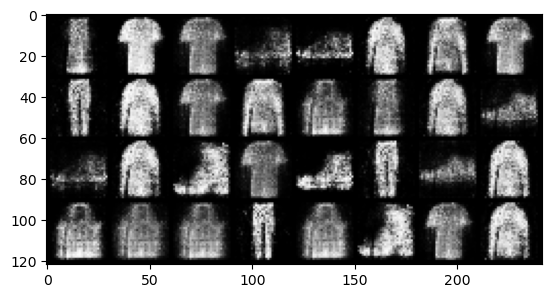

In [37]:
plt.imshow(training_progress_images[0])